## Performance comparison of Gaussian Mixture Model with K-means
We will Generate a dataset that consists of 3 clusters. Then we will plot the convergence and compare how effectively the data is modeled by a mixture of 3 Gaussians with specific covariance matrices and K-means.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [80]:
plot.ion()
def plot_data(X,y,title):

    plot.figure(figsize=(6, 6))  # Increase the figure size

    plot.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ch',markeredgecolor="black", markersize=8)  # Cyan hex
    plot.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'k^',markeredgecolor="red", markersize=8)  # Black triangles
    plot.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'y*', markeredgecolor="black", markersize=8)  # Yellow stars

    plot.title(title)
    plot.xlabel("X - 1")
    plot.ylabel("X - 2")
    plot.pause(0.00009)
    plot.clf()


"""This function generates a synthetic dataset with three classes, each following a multivariate normal distribution.
   The data points and their corresponding class labels are then visualized using the plot_data function."""
def Generate_Data_3Clusters(mean0, covariance0, mean1, covariance1, mean2, covariance2):
  X1 = np.random.multivariate_normal(mean0, covariance0, 100)
  X2 = np.random.multivariate_normal(mean1, covariance1, 100)
  X3 = np.random.multivariate_normal(mean2, covariance2, 300)
  X = np.concatenate((X1, X2, X3), axis=0)
  y = np.concatenate((np.zeros(100), np.ones(100), (np.ones(300)*2)), axis=0)
  plot_data(X,y,'Original Class Assignments')
  return X


"""The GMM_model function fits a Gaussian Mixture Model to the data X and uses the resulting model to assign cluster labels to each data point.
   It then visualizes the data points with their assigned cluster labels using the plot_data function.
"""
def GMM_model(X, covariance_type):
  gmm = GaussianMixture(3,covariance_type=covariance_type).fit(X)
  labels = gmm.predict(X)

  plot_data(X,labels,covariance_type+' GMM Class Assignments')


"""This function will perform K-means clustering on the data X and visualizes the results using a scatter plot,
   where each data point is colored according to its assigned cluster label."""
def plot_Kmeans(X):
    kmeans = KMeans(3, random_state=0)
    labels = kmeans.fit(X).predict(X)

    fig = plot.figure(figsize=(6, 6))
    plot.scatter(X[:, 0], X[:, 1], marker="H", c=labels, s=80, edgecolor="black", cmap="tab10")
    plot.title("K-means Class Assignments")
    plot.show()

Draw a data set where a mixture of 3 spherical Gaussians and K-means will be plot and compare who can model the data well.
(the covariance matrix is the identity matrix times some positive scalar)

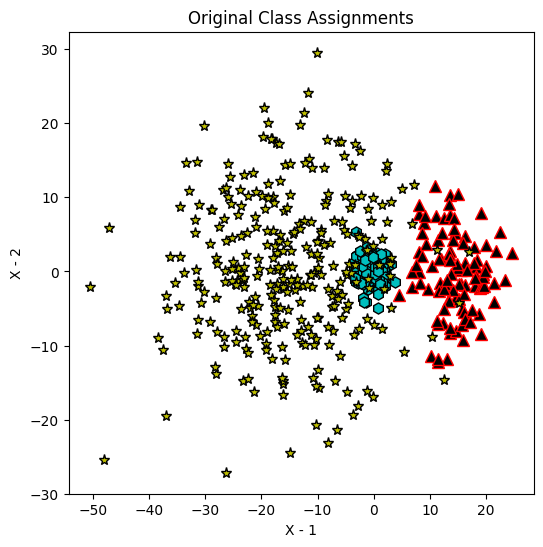

<Figure size 640x480 with 0 Axes>

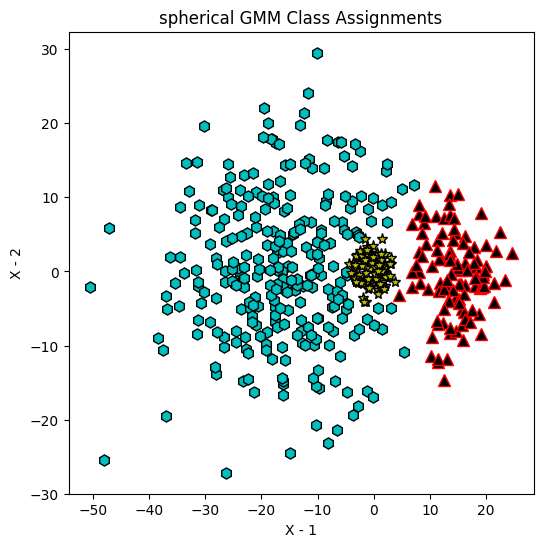

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

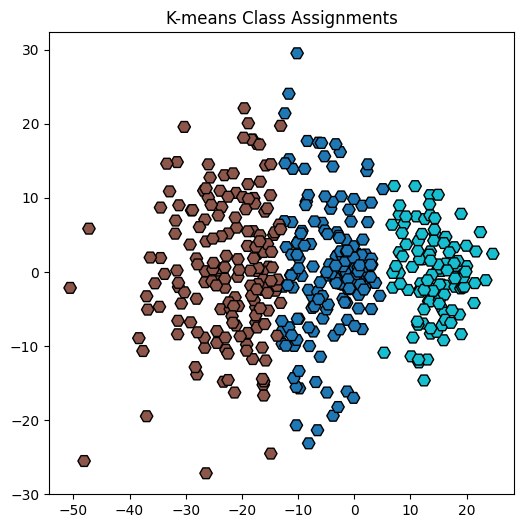

In [81]:
mean0 = [0, 0] #mean for gaussian distribution with class 0
covariance0 = [[4, 0],[0, 4]] #covariance for gaussian distribution with class 0
mean1 = [15, 0] #mean for gaussian distribution with class 1
covariance1 = [[24, 0],[0, 24]] #covariance for gaussian distribution with class 1
mean2 = [-15, 0] #mean for gaussian distribution with class -1
covariance2 = [[100, 0],[0, 100]] #covariance for gaussian distribution with class -1

X = Generate_Data_3Clusters(mean0, covariance0, mean1, covariance1, mean2, covariance2)

GMM_model(X,'spherical')

plot_Kmeans(X)

Draw a data set where a mixture of 3 spherical Gaussians, 3 Diagnoal Gaussians and K-means will be plotted and compare who can model the data well. (the covariance matrix is the identity matrix times some positive scalar)

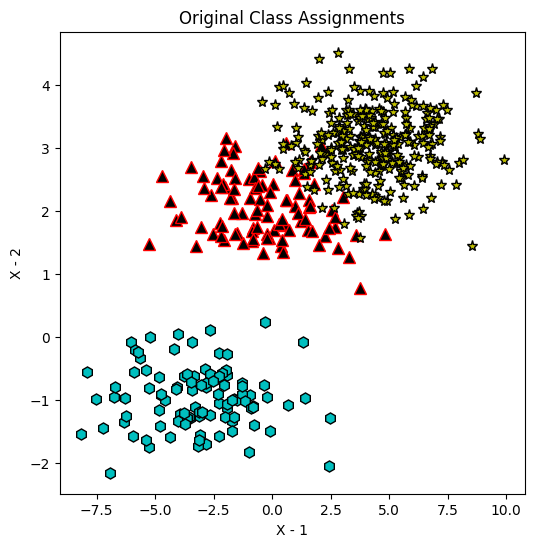

<Figure size 640x480 with 0 Axes>

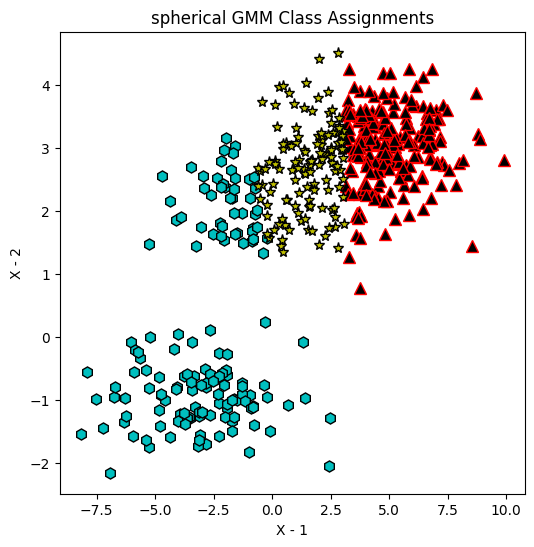

<Figure size 640x480 with 0 Axes>

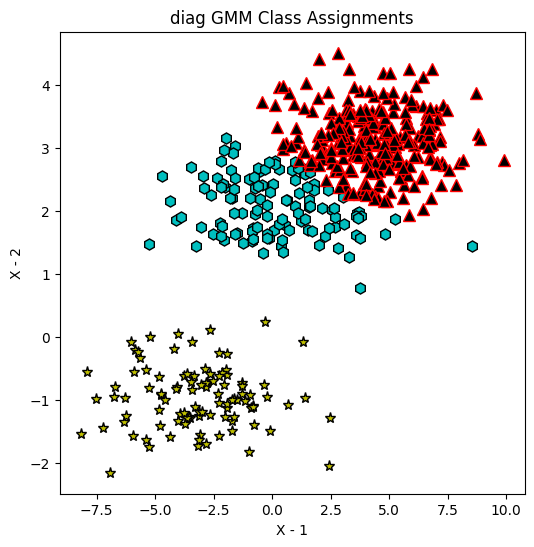

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

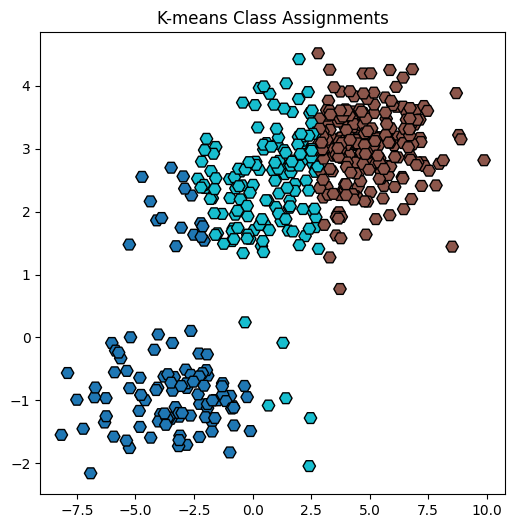

In [82]:
# mean0 - mean for gaussian distibution with class 0
mean0 = [-3, -1]
# covariance0 - covariance for gaussian distibution with class 0
covariance0 = [[4, 0],[0, .25]]

# mean1 - mean for gaussian distibution with class 1
mean1 = [0, 2]
# covariance1 - covariance for gaussian distibution with class 1
covariance1 = [[4, 0],[0, .25]]

# mean2 - mean for gaussian distibution with class -1
mean2 = [4, 3]
# covariance2 - covariance for gaussian distibution with class -1
covariance2 = [[4, 0],[0, .25]]

X = Generate_Data_3Clusters(mean0, covariance0, mean1, covariance1, mean2, covariance2)

GMM_model(X,'spherical')
GMM_model(X,'diag')
plot_Kmeans(X)

Draw a data set where a mixture of 3 Diagnoal Gaussians, unrestricted  covariance matrice and K-means will be plotted and compare who can model the data well. (the covariance matrix is the identity matrix times some positive scalar)

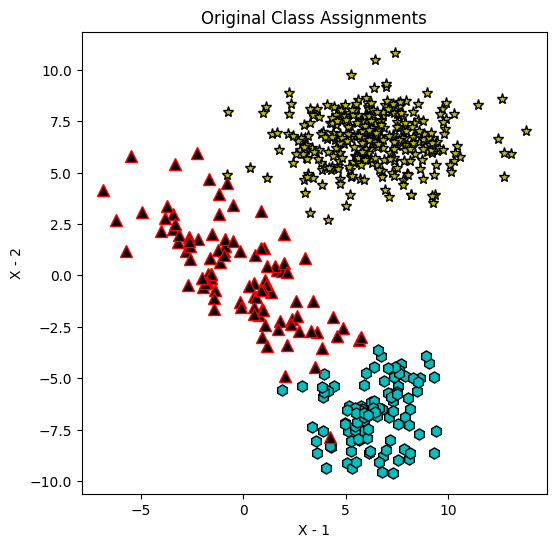

<Figure size 640x480 with 0 Axes>

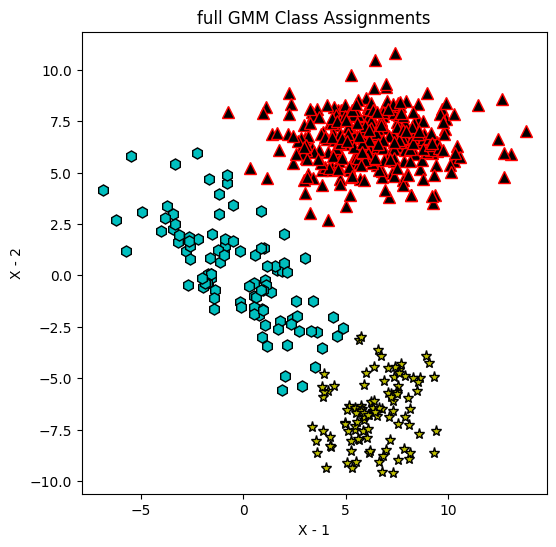

<Figure size 640x480 with 0 Axes>

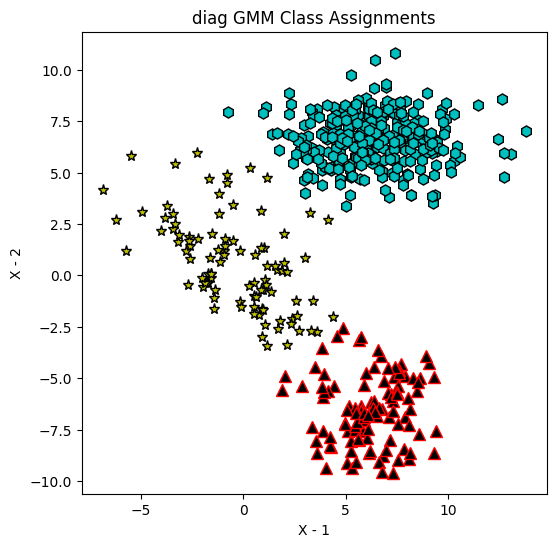

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

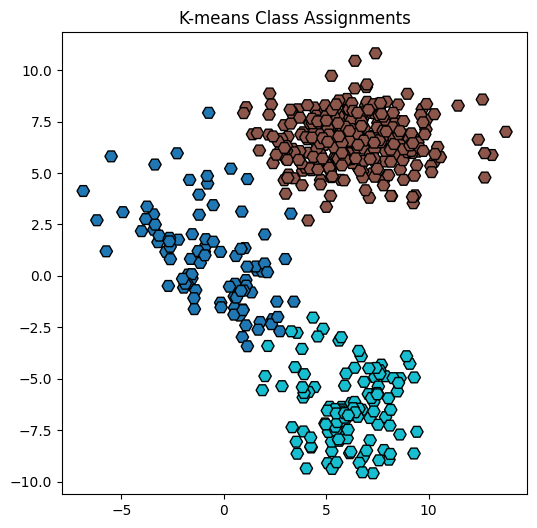

In [83]:
# mean0 - mean for gaussian distibution with class 0
mean0 = [6.5, -6.5]
# covariance0 - covariance for gaussian distibution with class 0
covariance0 = [[2.5, 0],[0, 2.5]]

# mean1 - mean for gaussian distibution with class 1
mean1 = [0, 0]
# covariance1 - covariance for gaussian distibution with class 1
covariance1 = [[5.5, -3.5],[-3.5, 5.5]]

# mean2 - mean for gaussian distibution with class -1
mean2 = [6.5, 6.5]
# covariance2 - covariance for gaussian distibution with class -1
covariance2 = [[6.5, 0],[0, 1.5]]

X = Generate_Data_3Clusters(mean0, covariance0, mean1, covariance1, mean2, covariance2)

GMM_model(X,'full')
GMM_model(X,'diag')
plot_Kmeans(X)

# Conclusion

1. Spherical Gaussians can model the data well compared to K-means.
2. Diagonal Gaussians can model the data well compared to K-means and a mixture of spherical Gaussians.
3. Gaussians with unrestricted covariance matrices can model the data well compared to K-means and a mixture of diagonal Gaussians.